In [55]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df = pd.read_csv('C:/Users/mayan/Dropbox/PC/Desktop/Data Mining/project/the weather of 187 countries in 2020.csv')

C:\Users\mayan\AppData\Local\Temp\ipykernel_18332\2256147113.py:1: DtypeWarning: Columns (16,17,18,19,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/mayan/Dropbox/PC/Desktop/Data Mining/project/the weather of 187 countries in 2020.csv')


In [57]:
df.shape

(1392575, 23)

In [58]:
df.columns


Index(['STATION', 'Country/Region', 'DATE', 'Year', 'Month', 'Day', 'PRCP',
       'SNWD', 'TAVG', 'TMAX', 'TMIN', 'SNOW', 'LATITUDE', 'LONGITUDE',
       'ELEVATION', 'PRCP_ATTRIBUTES', 'TAVG_ATTRIBUTES', 'TMAX_ATTRIBUTES',
       'TMIN_ATTRIBUTES', 'DAPR', 'MDPR', 'WESD', 'SNWD_ATTRIBUTES'],
      dtype='object')

In [59]:
df.isnull().sum()

STATION                  0
Country/Region           0
DATE                     0
Year                     0
Month                    0
Day                      0
PRCP                349206
SNWD               1015146
TAVG                513943
TMAX                525870
TMIN                494194
SNOW               1287183
LATITUDE           1287833
LONGITUDE          1287833
ELEVATION          1287833
PRCP_ATTRIBUTES    1386568
TAVG_ATTRIBUTES    1388725
TMAX_ATTRIBUTES    1386938
TMIN_ATTRIBUTES    1386701
DAPR               1391282
MDPR               1392494
WESD               1392573
SNWD_ATTRIBUTES    1392221
dtype: int64

## Last 8 columns have more than 99 % missing data so I have dropped those columns

In [60]:
df.drop(['ELEVATION', 'PRCP_ATTRIBUTES', 'TAVG_ATTRIBUTES', 'TMAX_ATTRIBUTES',
       'TMIN_ATTRIBUTES', 'DAPR', 'MDPR', 'WESD', 'SNWD_ATTRIBUTES'],axis = 1,inplace = True)

In [61]:
df

,STATION,Country/Region,DATE,Year,Month,Day,PRCP,SNWD,TAVG,TMAX,TMIN,SNOW,LATITUDE,LONGITUDE
0,TZ000063894,Comoros,2020-01-22,2020,1,22,10.9,NaN,27.6,30.2,24.9,NaN,NaN,NaN
1,TZ000063894,Comoros,2020-01-23,2020,1,23,0.0,NaN,26.7,NaN,NaN,NaN,NaN,NaN
2,TZ000063894,Comoros,2020-01-24,2020,1,24,9.4,NaN,27.9,30.6,25.6,NaN,NaN,NaN
3,TZ000063894,Comoros,2020-01-25,2020,1,25,0.3,NaN,27.9,30.2,16.3,NaN,NaN,NaN
4,TZ000063894,Comoros,2020-01-26,2020,1,26,0.0,NaN,28.2,31.5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392570,COM00080091,Colombia,2020-07-23,2020,7,23,0.0,NaN,28.1,NaN,23.0,NaN,NaN,NaN
1392571,COM00080091,Colombia,2020-07-24,2020,7,24,NaN,NaN,27.2,NaN,NaN,NaN,NaN,NaN
1392572,COM00080091,Colombia,2020-07-25,2020,7,25,NaN,NaN,26.8,NaN,NaN,NaN,NaN,NaN
1392573,COM00080091,Colombia,2020-07-26,2020,7,26,NaN,NaN,28.8,NaN,NaN,NaN,NaN,NaN


## Precipitation column have more than 75% of non null data , so taking only those instances in count which have non null precipitaiton value

In [62]:
prcp = df[df['PRCP']>=0]

In [63]:
prcp

,STATION,Country/Region,DATE,Year,Month,Day,PRCP,SNWD,TAVG,TMAX,TMIN,SNOW,LATITUDE,LONGITUDE
0,TZ000063894,Comoros,2020-01-22,2020,1,22,10.9,NaN,27.6,30.2,24.9,NaN,NaN,NaN
1,TZ000063894,Comoros,2020-01-23,2020,1,23,0.0,NaN,26.7,NaN,NaN,NaN,NaN,NaN
2,TZ000063894,Comoros,2020-01-24,2020,1,24,9.4,NaN,27.9,30.6,25.6,NaN,NaN,NaN
3,TZ000063894,Comoros,2020-01-25,2020,1,25,0.3,NaN,27.9,30.2,16.3,NaN,NaN,NaN
4,TZ000063894,Comoros,2020-01-26,2020,1,26,0.0,NaN,28.2,31.5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392561,COM00080091,Colombia,2020-07-14,2020,7,14,0.0,NaN,28.7,NaN,NaN,NaN,NaN,NaN
1392562,COM00080091,Colombia,2020-07-15,2020,7,15,0.0,NaN,30.3,NaN,24.0,NaN,NaN,NaN
1392563,COM00080091,Colombia,2020-07-16,2020,7,16,0.0,NaN,29.4,NaN,23.6,NaN,NaN,NaN
1392566,COM00080091,Colombia,2020-07-19,2020,7,19,0.0,NaN,29.7,NaN,25.0,NaN,NaN,NaN


In [9]:
prcp['Country/Region'].unique()

array(['Comoros', 'Georgia', 'Nepal', 'Philippines', 'Monaco', 'US',
       'Namibia', 'Lebanon', 'Zambia', 'Malaysia', 'Peru', 'Kenya',
       'Belarus', 'Lesotho', 'Tanzania', 'Greece', 'Barbados',
       'Singapore', 'Switzerland', 'Sri Lanka', 'China', 'Gabon',
       'Congo (Brazzaville)', 'United Arab Emirates', 'Tajikistan',
       'Syria', 'Lithuania', 'Paraguay', 'Romania', 'Maldives', 'Jamaica',
       'Kuwait', 'Finland', 'Argentina', 'Ethiopia', 'Japan', 'Cameroon',
       'Bhutan', 'Botswana', 'Pakistan', 'Brazil', 'Madagascar',
       'Eritrea', 'Mali', 'Thailand', 'Egypt', 'Ireland', 'Belgium',
       'Luxembourg', 'Fiji', 'Italy', 'Greenland', 'Antigua and Barbuda',
       'Andorra', 'Guinea', 'Nigeria', 'Ecuador', 'Guatemala',
       'Afghanistan', 'Suriname', 'Djibouti', 'Uganda', 'Niger', 'Israel',
       'Russia', 'Chile', 'Mexico', 'Seychelles',
       'Bosnia and Herzegovina', 'Montenegro', 'Trinidad and Tobago',
       'Togo', 'Panama', 'Denmark', 'Malta', 'Baham

In [10]:
prcp['Country/Region'].nunique()

170

In [12]:
df2 = prcp.pivot_table(index = ['Country/Region'], aggfunc ='size')
df2.sort_values(ascending = False)

Country/Region
Canada            227602
Sweden            106070
Germany           101761
Russia             80047
Netherlands        63159
                   ...  
Zimbabwe               6
Cabo Verde             5
Western Sahara         4
Mauritania             4
Zambia                 2
Length: 170, dtype: int64

## So above output gives us those top countries which contain most of the instances and we will consider only top 5 countries for our analysis as they contain sufficient amount of instances which are Canada, Sweden, Germany, Russia,Netherlands

In [65]:
country = ['Canada','Sweden','Germany','Russia','Netherlands']

In [66]:
prcp = prcp[prcp['Country/Region'].isin(country)]

In [67]:
prcp.shape

(578639, 14)

In [68]:
prcp.isnull().sum()

STATION                0
Country/Region         0
DATE                   0
Year                   0
Month                  0
Day                    0
PRCP                   0
SNWD              275690
TAVG              360867
TMAX              242404
TMIN              257517
SNOW              480630
LATITUDE          567118
LONGITUDE         567118
dtype: int64

In [17]:
prcp

,STATION,Country/Region,DATE,Year,Month,Day,PRCP,SNWD,TAVG,TMAX,TMIN,SNOW,LATITUDE,LONGITUDE
327846,RSM00034056,Russia,2020-01-22,2020,1,22,4.1,279.0,0.2,1.8,NaN,NaN,NaN,NaN
327847,RSM00034056,Russia,2020-01-23,2020,1,23,1.5,279.0,-4.3,-2.2,NaN,NaN,NaN,NaN
327849,RSM00034056,Russia,2020-01-25,2020,1,25,5.1,320.0,-0.1,1.2,-6.9,NaN,NaN,NaN
327850,RSM00034056,Russia,2020-01-26,2020,1,26,0.8,320.0,-2.6,-0.9,NaN,NaN,NaN,NaN
327851,RSM00034056,Russia,2020-01-27,2020,1,27,0.0,320.0,-0.8,1.6,-6.1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350123,GME00123994,Germany,2020-07-23,2020,7,23,0.0,NaN,NaN,25.2,9.8,NaN,NaN,NaN
1350124,GME00123994,Germany,2020-07-24,2020,7,24,0.0,NaN,NaN,25.8,11.8,NaN,NaN,NaN
1350125,GME00123994,Germany,2020-07-25,2020,7,25,10.4,NaN,NaN,26.3,15.5,NaN,NaN,NaN
1350126,GME00123994,Germany,2020-07-26,2020,7,26,3.0,NaN,NaN,25.3,14.4,NaN,NaN,NaN


## Boxplot of Precipitation, Temperature Average, Maximum Temperature and Minimum Temperature to know the distribution of data

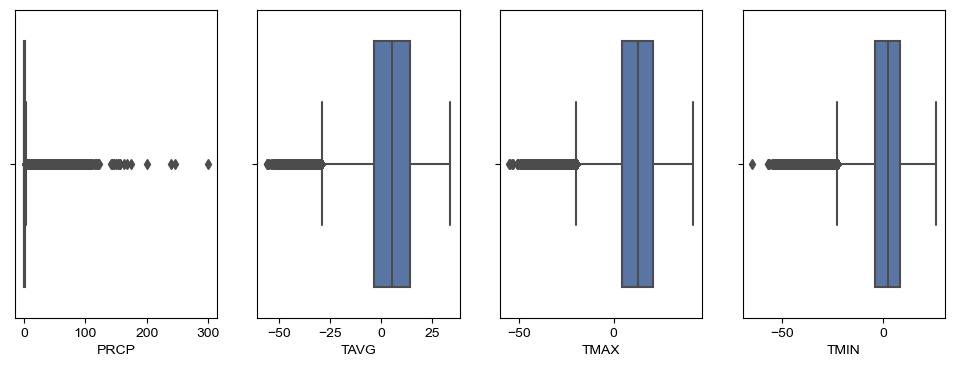

In [18]:
fig, ax = plt.subplots(1, 4, figsize=(12, 4))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["PRCP", "TAVG", "TMAX","TMIN"]):
    sns.boxplot(x=prcp[col], ax=ax[axid])

## There are missing value of TAVG,TMAX,TMIN so from above box plot these attributes are having normal distribution as median is in mid of boxplot so by grouping by STATION attribute of Country we will fill those missing values with the mean of correspondin attribute

In [69]:
prcp.loc[:, ['TAVG', 'TMAX', 'TMIN']] = prcp.groupby('STATION')[['TAVG', 'TMAX', 'TMIN']] \
    .transform(lambda x: x.fillna(x.mean()))


C:\Users\mayan\AppData\Local\Temp\ipykernel_18332\127533366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prcp.loc[:, ['TAVG', 'TMAX', 'TMIN']] = prcp.groupby('STATION')[['TAVG', 'TMAX', 'TMIN']] \


In [70]:
prcp.isnull().sum()

STATION                0
Country/Region         0
DATE                   0
Year                   0
Month                  0
Day                    0
PRCP                   0
SNWD              275690
TAVG              359234
TMAX              228500
TMIN              228260
SNOW              480630
LATITUDE          567118
LONGITUDE         567118
dtype: int64

## By doing so there is not that much decrement in null values of TMAX,TMIN,TAVG so now this time i have grouped by COUNTRY and replace these missing value by Country's average temp,maximum temperature and minimum temperature 

In [71]:
prcp.loc[:, ['TAVG', 'TMAX', 'TMIN']] = prcp.groupby('Country/Region')[['TAVG', 'TMAX', 'TMIN']] \
    .transform(lambda x: x.fillna(x.mean()))

C:\Users\mayan\AppData\Local\Temp\ipykernel_18332\7355570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prcp.loc[:, ['TAVG', 'TMAX', 'TMIN']] = prcp.groupby('Country/Region')[['TAVG', 'TMAX', 'TMIN']] \


In [72]:
prcp.isnull().sum()

STATION                0
Country/Region         0
DATE                   0
Year                   0
Month                  0
Day                    0
PRCP                   0
SNWD              275690
TAVG                   0
TMAX                   0
TMIN                   0
SNOW              480630
LATITUDE          567118
LONGITUDE         567118
dtype: int64

## Now there is no null values in TAVG,TMAX and TMIN

# Missing value of Latitude and Longitude is managed by using geopandas library but in this dataset we dont have exact address of station in country only station id is provided so those stations will have common geocodes of their corresponding country

In [73]:
import geopandas as gpd
from geopandas.tools import geocode

In [74]:
country_dic = prcp['Country/Region'].unique()

In [75]:
np.array(country_dic)

array(['Russia', 'Netherlands', 'Canada', 'Sweden', 'Germany'],
      dtype=object)

In [77]:
from geopy.geocoders import Nominatim
def geocode(Country):
    geolocator = Nominatim(user_agent="mayank_g")
    location = geolocator.geocode(Country, exactly_one = False)
    return location

In [78]:
d = {}
for Country in country_dic:
    loc = geocode(Country)
    if loc is None:
        d[Country] = 'Nothing found'
    else: 
        d[Country] = loc[0].latitude,loc[0].longitude

In [79]:
d

{'Russia': (64.6863136, 97.7453061),
 'Netherlands': (52.2434979, 5.6343227),
 'Canada': (61.0666922, -107.991707),
 'Sweden': (59.6749712, 14.5208584),
 'Germany': (51.1638175, 10.4478313)}

In [80]:
def fill_lat_lon(row):
    country = row['Country/Region']
    if country in d:
        row['LATITUDE'] = d[country][0]
        row['LONGITUDE'] = d[country][1]
    return row

prcp = prcp.apply(fill_lat_lon, axis=1)

In [81]:
prcp

,STATION,Country/Region,DATE,Year,Month,Day,PRCP,SNWD,TAVG,TMAX,TMIN,SNOW,LATITUDE,LONGITUDE
327846,RSM00034056,Russia,2020-01-22,2020,1,22,4.1,279.0,0.200000,1.8,-3.494737,NaN,64.686314,97.745306
327847,RSM00034056,Russia,2020-01-23,2020,1,23,1.5,279.0,-4.300000,-2.2,-3.494737,NaN,64.686314,97.745306
327849,RSM00034056,Russia,2020-01-25,2020,1,25,5.1,320.0,-0.100000,1.2,-6.900000,NaN,64.686314,97.745306
327850,RSM00034056,Russia,2020-01-26,2020,1,26,0.8,320.0,-2.600000,-0.9,-3.494737,NaN,64.686314,97.745306
327851,RSM00034056,Russia,2020-01-27,2020,1,27,0.0,320.0,-0.800000,1.6,-6.100000,NaN,64.686314,97.745306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350123,GME00123994,Germany,2020-07-23,2020,7,23,0.0,NaN,11.547962,25.2,9.800000,NaN,51.163818,10.447831
1350124,GME00123994,Germany,2020-07-24,2020,7,24,0.0,NaN,11.547962,25.8,11.800000,NaN,51.163818,10.447831
1350125,GME00123994,Germany,2020-07-25,2020,7,25,10.4,NaN,11.547962,26.3,15.500000,NaN,51.163818,10.447831
1350126,GME00123994,Germany,2020-07-26,2020,7,26,3.0,NaN,11.547962,25.3,14.400000,NaN,51.163818,10.447831


In [82]:
prcp.isnull().sum()

STATION                0
Country/Region         0
DATE                   0
Year                   0
Month                  0
Day                    0
PRCP                   0
SNWD              275690
TAVG                   0
TMAX                   0
TMIN                   0
SNOW              480630
LATITUDE               0
LONGITUDE              0
dtype: int64

## Even now Snow and Snow depth attributes have so many null values and there is no other data available online and these are non derviable attributes we have to drop these two attributes

In [84]:
prcp.drop(['SNWD','SNOW'],axis = 1,inplace = True)

In [85]:
prcp

,STATION,Country/Region,DATE,Year,Month,Day,PRCP,TAVG,TMAX,TMIN,LATITUDE,LONGITUDE
327846,RSM00034056,Russia,2020-01-22,2020,1,22,4.1,0.200000,1.8,-3.494737,64.686314,97.745306
327847,RSM00034056,Russia,2020-01-23,2020,1,23,1.5,-4.300000,-2.2,-3.494737,64.686314,97.745306
327849,RSM00034056,Russia,2020-01-25,2020,1,25,5.1,-0.100000,1.2,-6.900000,64.686314,97.745306
327850,RSM00034056,Russia,2020-01-26,2020,1,26,0.8,-2.600000,-0.9,-3.494737,64.686314,97.745306
327851,RSM00034056,Russia,2020-01-27,2020,1,27,0.0,-0.800000,1.6,-6.100000,64.686314,97.745306
...,...,...,...,...,...,...,...,...,...,...,...,...
1350123,GME00123994,Germany,2020-07-23,2020,7,23,0.0,11.547962,25.2,9.800000,51.163818,10.447831
1350124,GME00123994,Germany,2020-07-24,2020,7,24,0.0,11.547962,25.8,11.800000,51.163818,10.447831
1350125,GME00123994,Germany,2020-07-25,2020,7,25,10.4,11.547962,26.3,15.500000,51.163818,10.447831
1350126,GME00123994,Germany,2020-07-26,2020,7,26,3.0,11.547962,25.3,14.400000,51.163818,10.447831


In [86]:
prcp.isnull().sum()

STATION           0
Country/Region    0
DATE              0
Year              0
Month             0
Day               0
PRCP              0
TAVG              0
TMAX              0
TMIN              0
LATITUDE          0
LONGITUDE         0
dtype: int64

# Scatter Plot TAVG v/s PRCP

<Axes: xlabel='TAVG', ylabel='PRCP'>

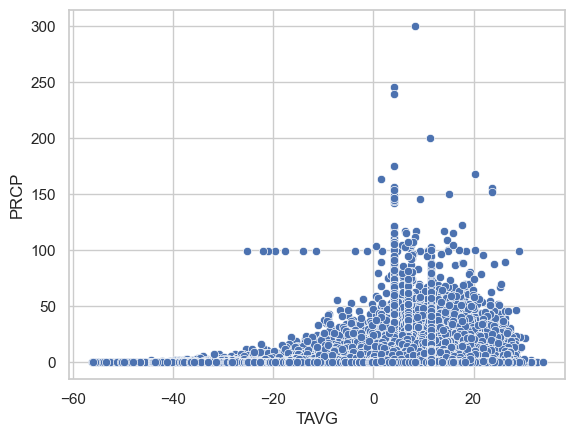

In [87]:
sns.scatterplot(x=prcp["TAVG"], y=prcp["PRCP"])

# Scatter Plot TMAX v/s TMIN

<Axes: xlabel='TMAX', ylabel='TMIN'>

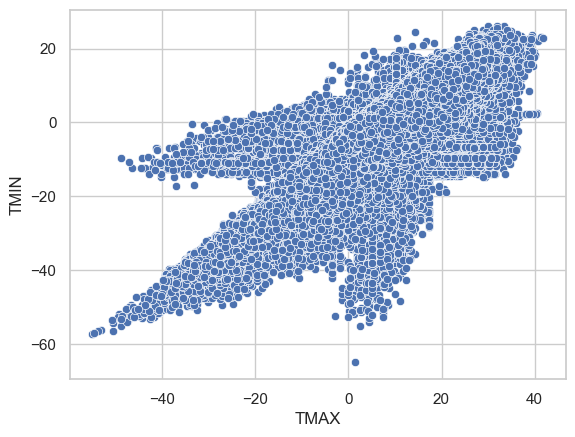

In [88]:
sns.scatterplot(x=prcp["TMAX"], y=prcp["TMIN"])

# Scatter Plot County/Region v/s PRCP

<Axes: xlabel='Country/Region', ylabel='PRCP'>

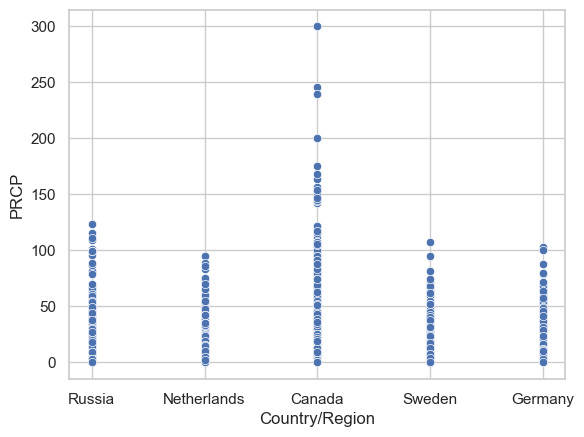

In [27]:
sns.scatterplot(x=prcp["Country/Region"], y=prcp["PRCP"])

C:\Users\mayan\AppData\Local\Temp\ipykernel_18332\1850306797.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=prcp.corr(), lw = 1)


<Axes: >

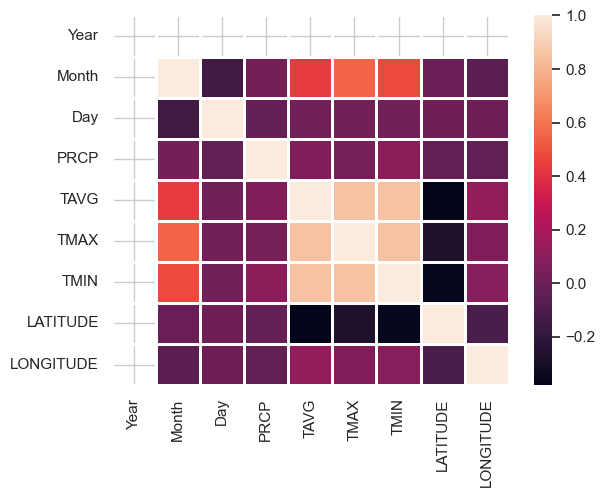

In [89]:
sns.heatmap(data=prcp.corr(), lw = 1)

In [45]:
country_dis = prcp["Country/Region"].value_counts()
country_dis

Canada         227602
Sweden         106070
Germany        101761
Russia          80047
Netherlands     63159
Name: Country/Region, dtype: int64

# Pie Chart for Country wise distribution

<Axes: ylabel='Country/Region'>

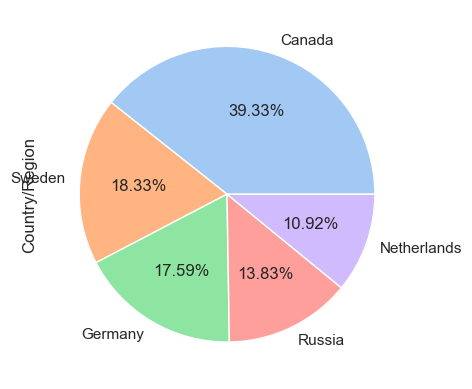

In [47]:
piec_colors = sns.color_palette('pastel')[0:len('Country/Region')]
country_dis.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')